In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import NuSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras 
from keras.models import Sequential 
from keras import Input 
from keras.layers import Dense 
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras import metrics
import sklearn.metrics as met
import keras.backend as K
import warnings
warnings.filterwarnings('ignore')


In [2]:
X, y = datasets.fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
train_size = 0.7  # to make the example run faster
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)


In [3]:
X_train.shape

(13192, 130107)

In [4]:
X_test.shape

(5654, 130107)

In [5]:
y_test.shape

(5654,)

In [6]:
encoder_train = LabelEncoder()
encoder_train.fit(y_train)
encoded_y_train = encoder_train.transform(y_train)
new_y_train = np_utils.to_categorical(encoded_y_train)
new_y_train.shape

(13192, 20)

In [7]:
print(new_y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [8]:
encoder_test = LabelEncoder()
encoder_test.fit(y_test)
encoded_y_test = encoder_test.transform(y_test)
new_y_test = np_utils.to_categorical(encoded_y_test)
new_y_test.shape

(5654, 20)

In [9]:
print(new_y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
model_1 = Sequential(name="model_1")
model_1.add(Input(shape=(130107,), name="Input"))
model_1.add(Dense(256,kernel_initializer='normal', activation='relu'))
model_1.add(Dense(64,kernel_initializer='normal', activation='relu'))
model_1.add(Dense(128, kernel_initializer='normal', activation='relu'))
model_1.add(Dense(20, activation='softmax'))
optimizer_1 = SGD(learning_rate=0.01, momentum=0.9)
model_1.compile(loss='categorical_crossentropy', optimizer = optimizer_1, metrics=[metrics.CategoricalAccuracy()])
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               33307648  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 20)                2580      
                                                                 
Total params: 33,334,996
Trainable params: 33,334,996
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_1_hist = model_1.fit(X_train, new_y_train, batch_size = 2048, epochs=500, verbose =0, validation_data=(X_test, new_y_test))

In [13]:
print(model_1_hist.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [14]:
model_1_train_acc = model_1.evaluate(X_train, new_y_train, verbose=0)
model_1_test_acc = model_1.evaluate(X_test, new_y_test, verbose=0)

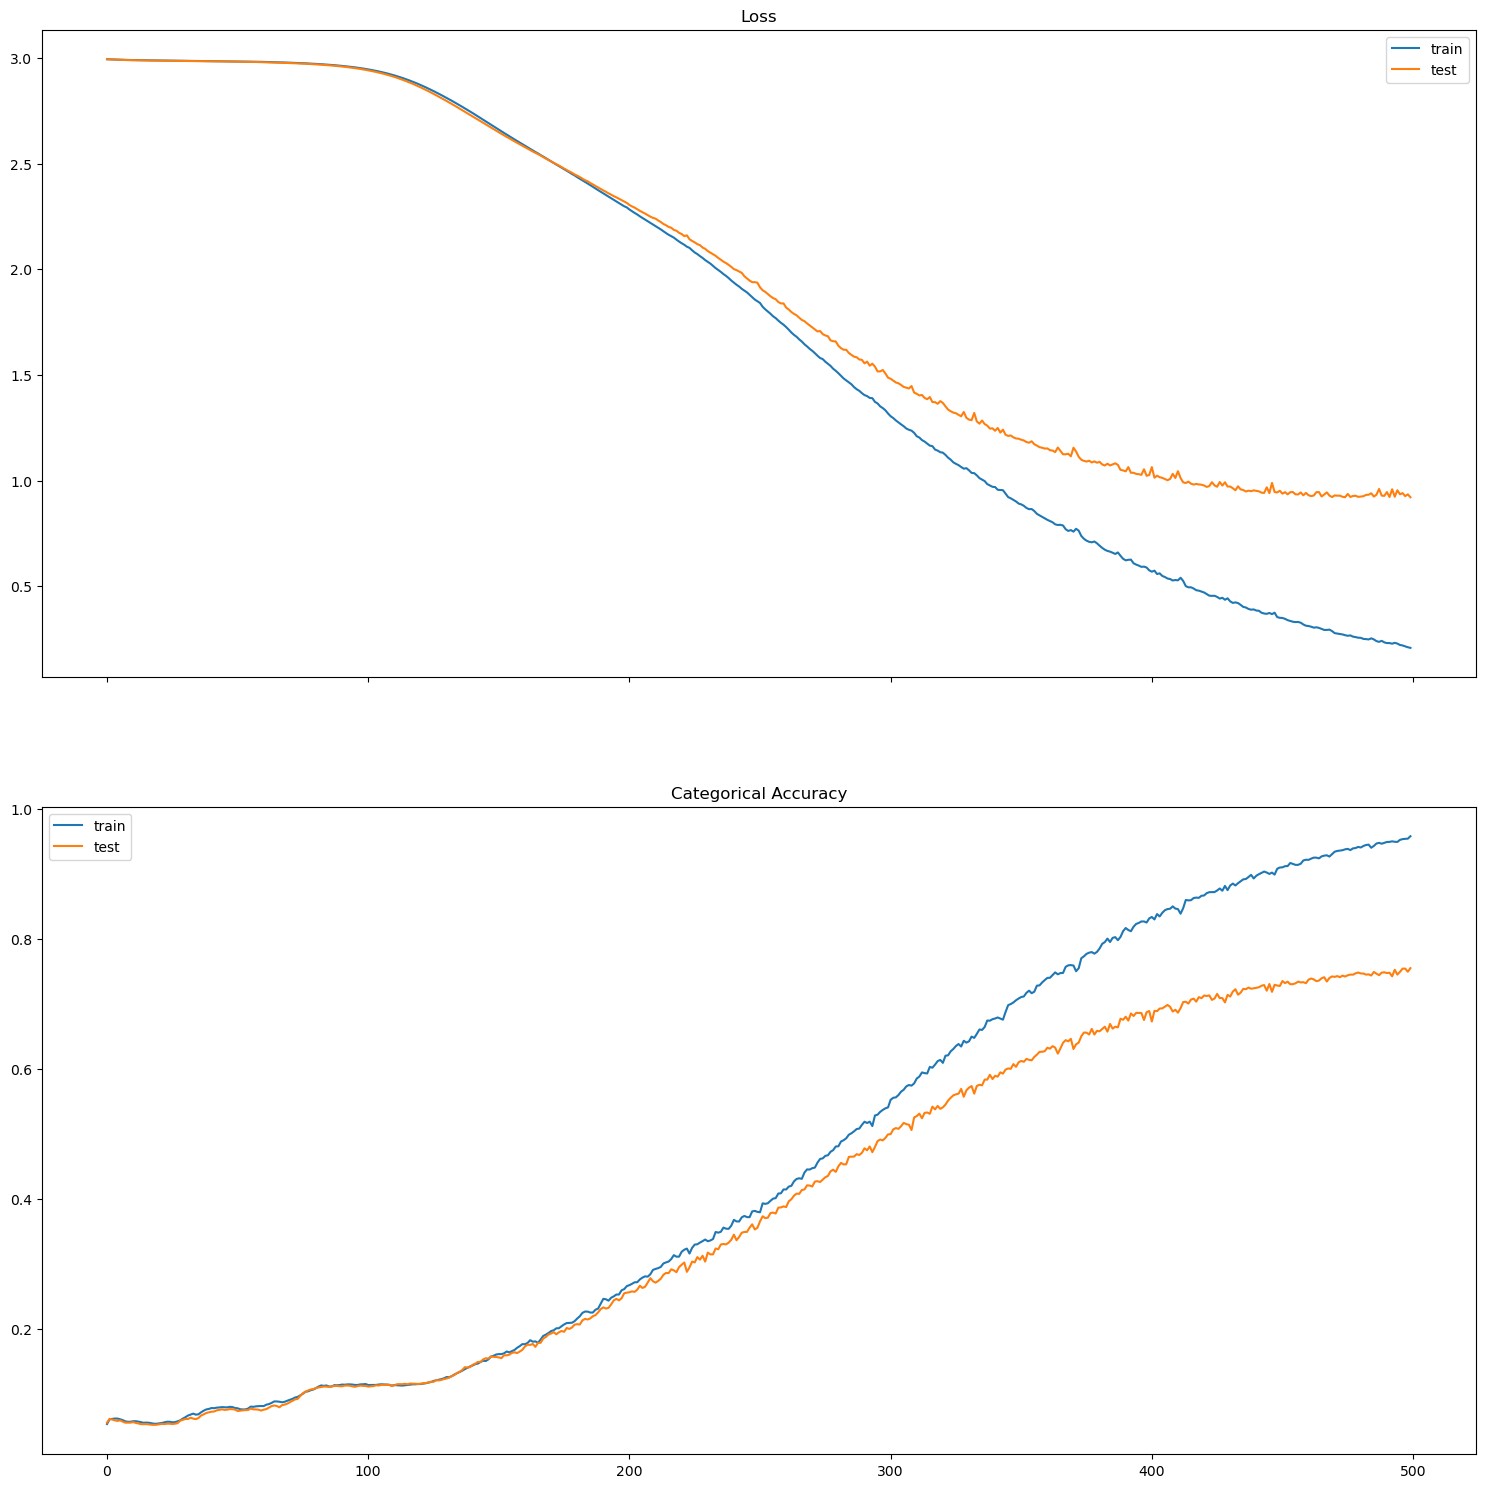

In [17]:
fig, axs = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 18.5)
axs[0].set_title('Loss')
axs[0].plot(model_1_hist.history['loss'], label='train')
axs[0].plot(model_1_hist.history['val_loss'], label='test')
axs[0].legend()
axs[1].set_title('Categorical Accuracy')
axs[1].plot(model_1_hist.history['categorical_accuracy'], label='train')
axs[1].plot(model_1_hist.history['val_categorical_accuracy'], label='test')
axs[1].legend()
# axs[2].set_title('Recall')
# axs[2].plot(model_1_hist.history['recall'], label='train')
# axs[2].plot(model_1_hist.history['val_recall'], label='test')
# axs[2].legend()
# axs[3].set_title('Precision')
# axs[3].plot(model_1_hist.history['precision'], label='train')
# axs[3].plot(model_1_hist.history['val_precision'], label='test')
# axs[3].legend()
plt.show()

In [16]:
print(met.classification_report(np.argmax(new_y_test, axis = -1), np.argmax(model_1.predict(X_test, batch_size = 1), axis= -1), digits = 4))

              precision    recall  f1-score   support

           0     0.7156    0.6652    0.6895       227
           1     0.6268    0.6202    0.6235       287
           2     0.7326    0.6655    0.6974       284
           3     0.7128    0.6624    0.6867       311
           4     0.7540    0.6448    0.6952       290
           5     0.7887    0.7492    0.7684       299
           6     0.8481    0.7742    0.8094       310
           7     0.7209    0.7912    0.7544       297
           8     0.8067    0.7683    0.7870       315
           9     0.8287    0.8742    0.8509       310
          10     0.9188    0.8646    0.8909       288
          11     0.8892    0.8836    0.8864       318
          12     0.4798    0.6620    0.5564       287
          13     0.7611    0.7852    0.7730       284
          14     0.7450    0.8182    0.7799       275
          15     0.8298    0.8041    0.8168       291
          16     0.8315    0.7817    0.8058       284
          17     0.9388    

In [18]:
model_2 = Sequential(name="model_1")
model_2.add(Input(shape=(130107,), name="Input"))
model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
model_2.add(Dense(20, activation='softmax'))
optimizer_2 = SGD(learning_rate=0.01, momentum=0.9)
model_2.compile(loss='categorical_crossentropy', optimizer = optimizer_2, metrics=[metrics.CategoricalAccuracy()])
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33307648  
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
Total params: 33,325,396
Trainable params: 33,325,396
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2_hist = model_2.fit(X_train, new_y_train, batch_size = 2048, epochs=500, verbose =0, validation_data=(X_test, new_y_test))

In [20]:
print(model_2_hist.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [21]:
model_1_train_acc = model_1.evaluate(X_train, new_y_train, verbose=0)
model_1_test_acc = model_1.evaluate(X_test, new_y_test, verbose=0)

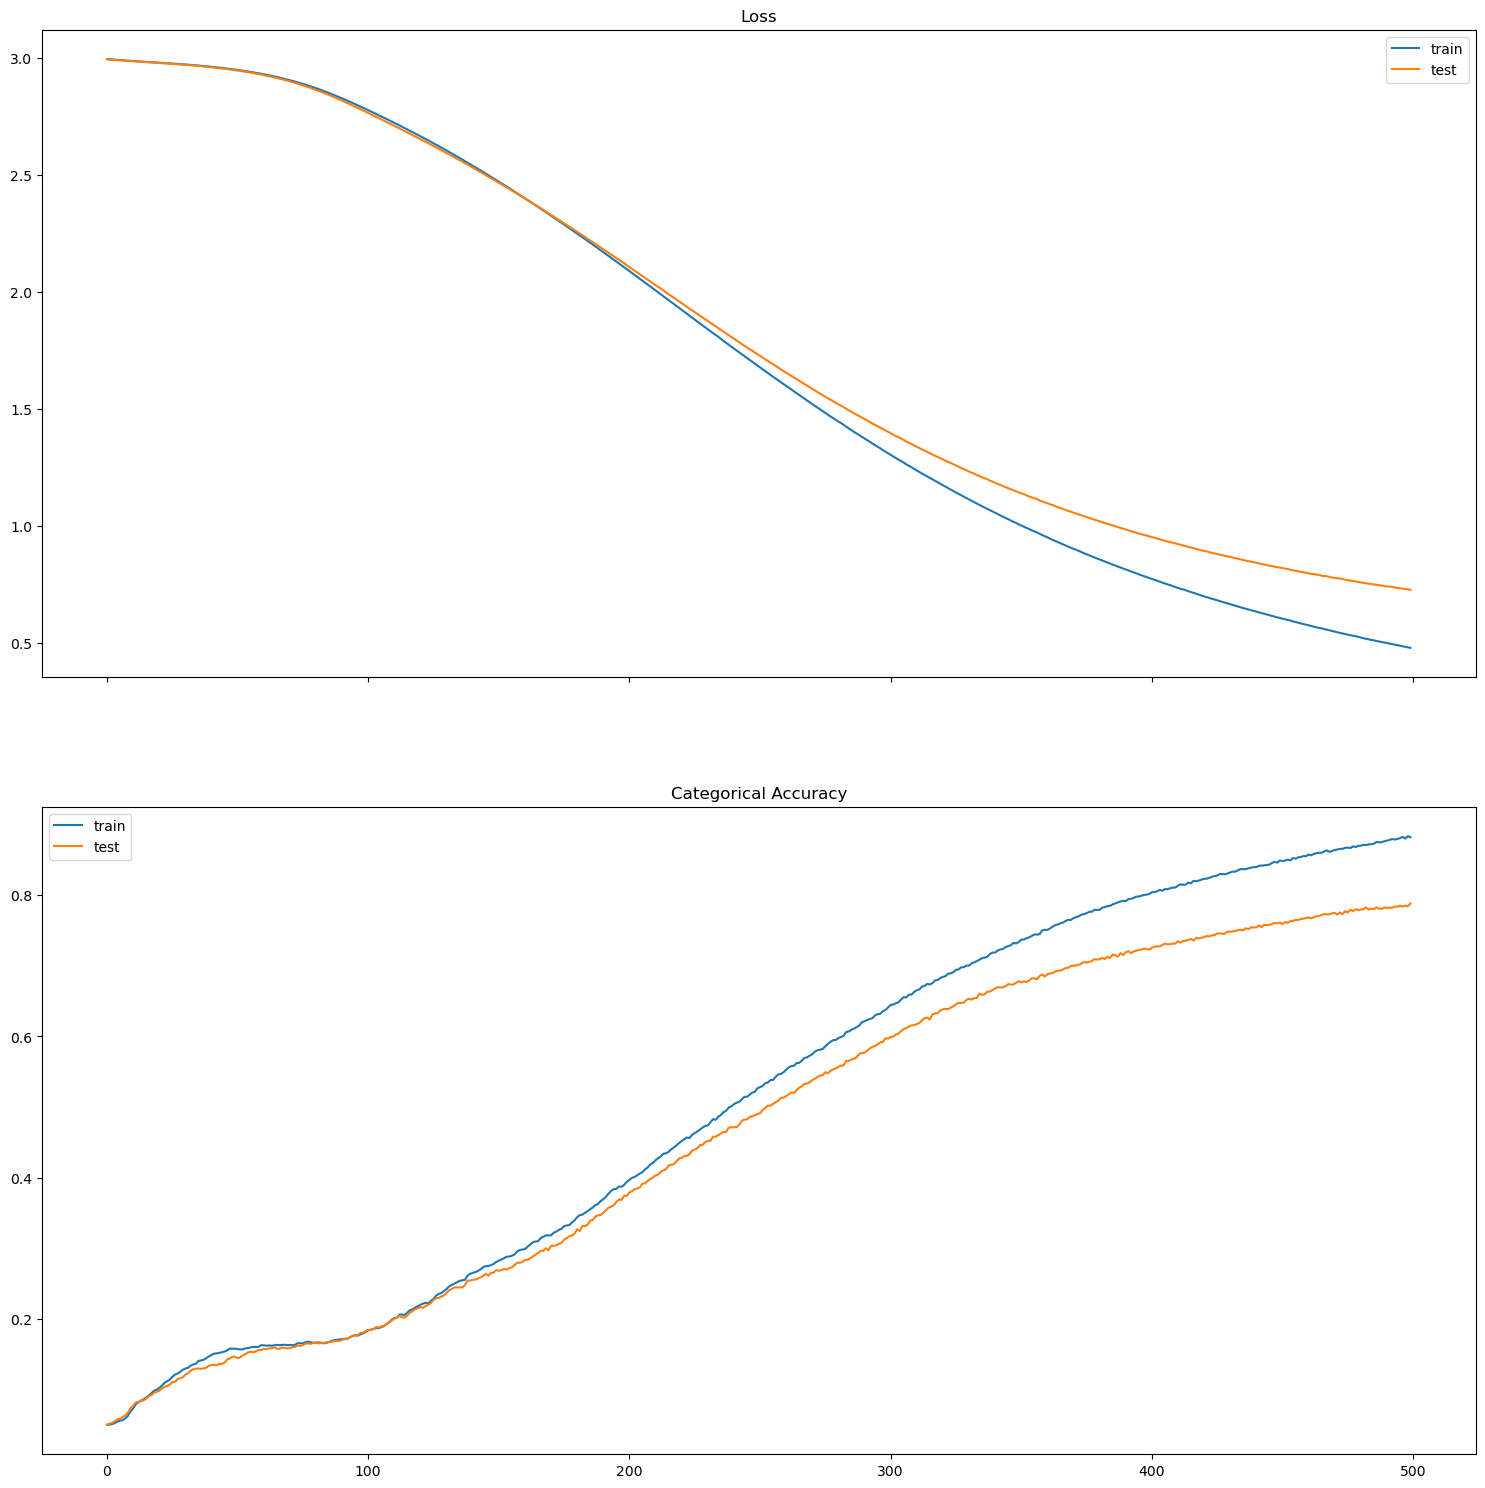

In [22]:
fig, axs = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 18.5)
axs[0].set_title('Loss')
axs[0].plot(model_2_hist.history['loss'], label='train')
axs[0].plot(model_2_hist.history['val_loss'], label='test')
axs[0].legend()
axs[1].set_title('Categorical Accuracy')
axs[1].plot(model_2_hist.history['categorical_accuracy'], label='train')
axs[1].plot(model_2_hist.history['val_categorical_accuracy'], label='test')
axs[1].legend()
# axs[2].set_title('Recall')
# axs[2].plot(model_1_hist.history['recall'], label='train')
# axs[2].plot(model_1_hist.history['val_recall'], label='test')
# axs[2].legend()
# axs[3].set_title('Precision')
# axs[3].plot(model_1_hist.history['precision'], label='train')
# axs[3].plot(model_1_hist.history['val_precision'], label='test')
# axs[3].legend()
plt.show()

In [23]:
print(met.classification_report(np.argmax(new_y_test, axis = -1), np.argmax(model_2.predict(X_test, batch_size = 1), axis= -1), digits = 4))

              precision    recall  f1-score   support

           0     0.7478    0.7577    0.7527       227
           1     0.6258    0.6934    0.6579       287
           2     0.7364    0.6690    0.7011       284
           3     0.7363    0.6463    0.6884       311
           4     0.7467    0.7724    0.7593       290
           5     0.8050    0.7592    0.7814       299
           6     0.8233    0.8419    0.8325       310
           7     0.7994    0.8586    0.8279       297
           8     0.9364    0.8413    0.8863       315
           9     0.8288    0.8903    0.8585       310
          10     0.9255    0.9062    0.9158       288
          11     0.9049    0.8679    0.8860       318
          12     0.5888    0.6934    0.6368       287
          13     0.7630    0.8275    0.7939       284
          14     0.8530    0.8655    0.8592       275
          15     0.7827    0.8419    0.8113       291
          16     0.8053    0.8592    0.8313       284
          17     0.9404    

Both model 1 and model 2 show that they are begining to suffer from over fitting. Due to the slightly lower complexity of model 2, the over fitting is less, though as you can see in the line graphs it is training slower as well. I believe this is also why you can see a more smooth training curve as the model is not over fitting very heavily after each epoch.

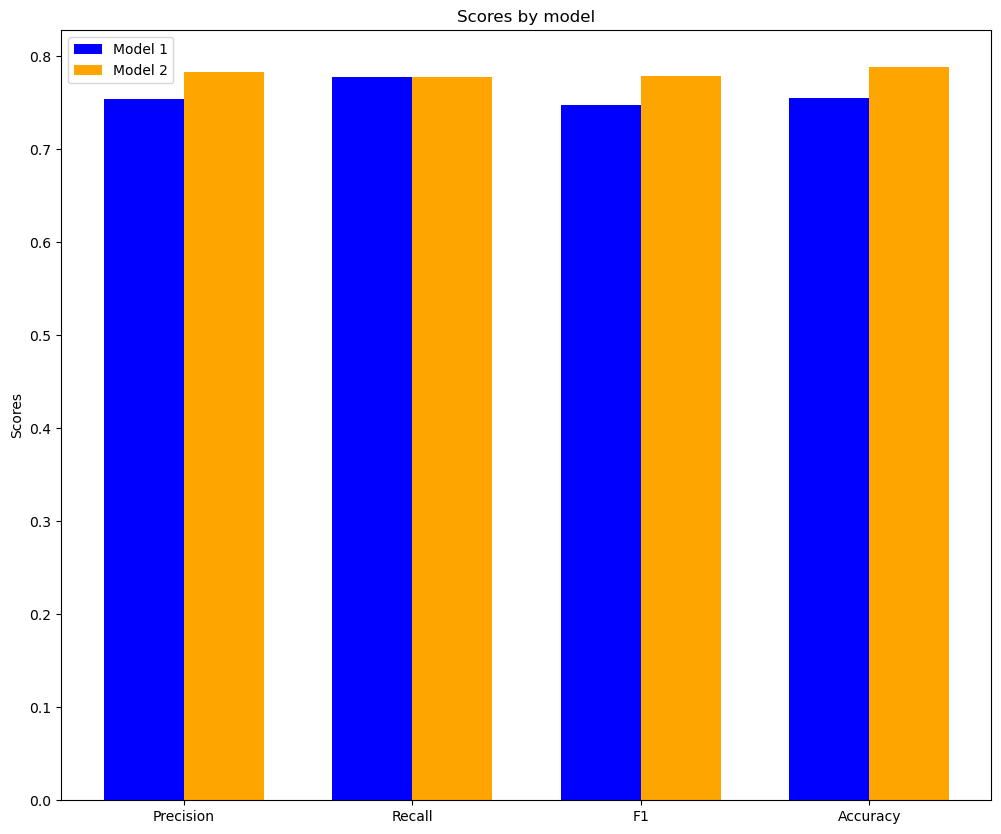

In [44]:
data = [[0.7539, 0.7781, 0.7471, 0.7549],
[0.7835, 0.7781, 0.7786, 0.7885]]
ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
m_1 = ax.bar(ind, data[0], color = 'b', width = width)
m_2 = ax.bar(ind + width, data[1], color = 'orange', width = width)
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Precision', 'Recall', 'F1', 'Accuracy'))
ax.legend((m_1[0], m_2[0]), ('Model 1', 'Model 2'))
plt.show()

Here we can more clearly see that reducing the model complexity by a small amount yeilded significantly better results in three out of four of the metrics. 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 256)               33307648  
                                                                 
 dense_59 (Dense)            (None, 64)                16448     
                                                                 
 dense_60 (Dense)            (None, 20)                1300      
                                                                 
Total params: 33,325,396
Trainable params: 33,325,396
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 256)               33307648  
                                                                 
 dense_62 (Dense)            (

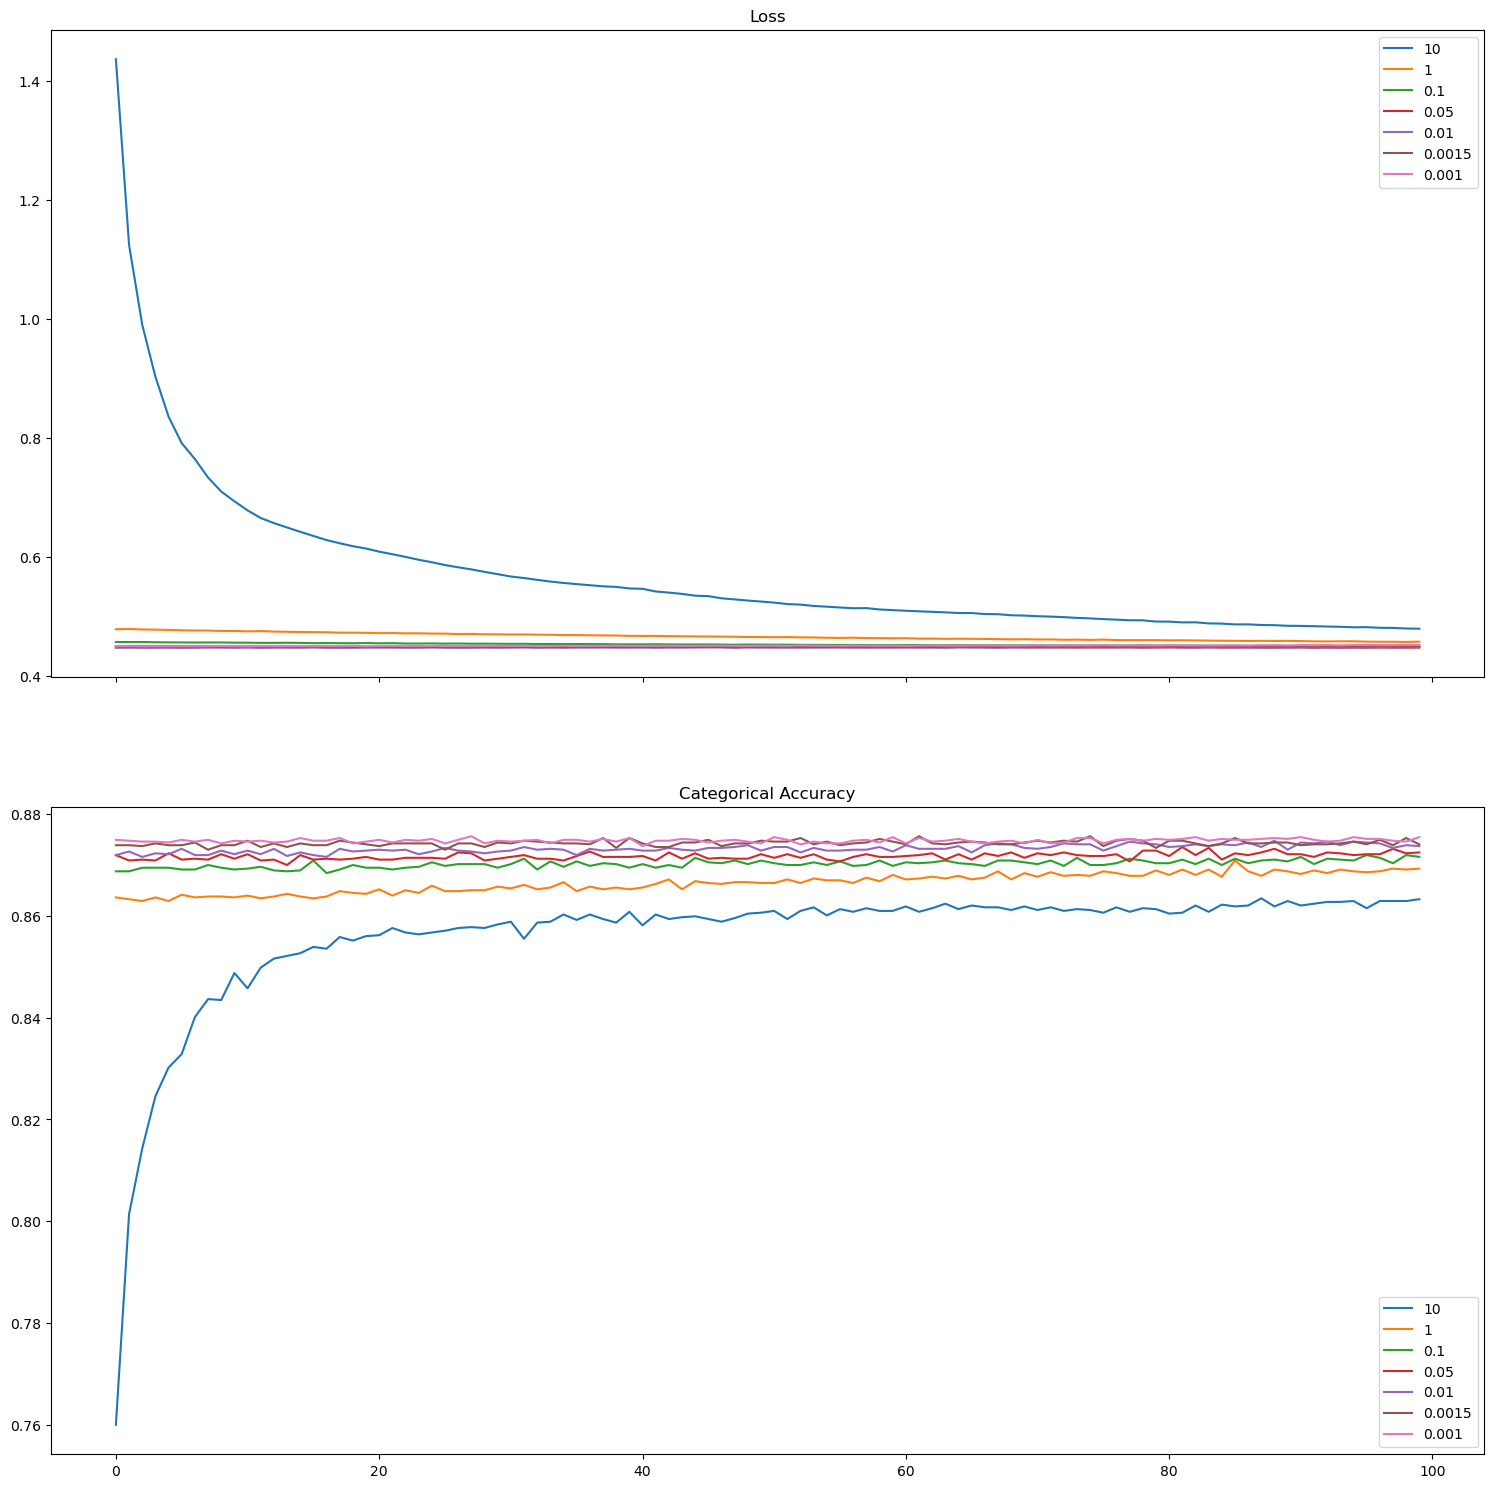

In [127]:
learning_rates = [10, 1, 0.1, 0.05, 0.01, 0.0015, 0.001]
histories = []
fig, axs = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 18.5)
axs[0].set_title('Loss')
axs[1].set_title('Categorical Accuracy')
def get_model_2(learn):
    model_2 = Sequential(name="model_2")
    model_2.add(Input(shape=(130107,), name="Input"))
    model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
    model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
    model_2.add(Dense(20, activation='softmax'))
    optimizer_2 = SGD(learning_rate=learn, momentum=0.9)
    model_2.compile(loss='categorical_crossentropy', optimizer = optimizer_2, metrics=[metrics.CategoricalAccuracy()])
    model_2.summary()
    return (model_2)
for lr in learning_rates:
    model = get_model_2(lr)
    model_hist = model_2.fit(X_train, new_y_train, batch_size = 2048, epochs=100, verbose =0, validation_data=(X_test, new_y_test))
    histories.append(model_hist)
    axs[0].plot(model_hist.history['val_loss'], label='{}'.format(lr))
    axs[1].plot(model_hist.history['val_categorical_accuracy'], label='{}'.format(lr))
axs[0].legend()
axs[1].legend()
plt.show()
    

In these figures, you can see how a lower learning rate allows this model to converge faster with a higher accuracy. Using momentum helps the model make the nessesary sized updates, which is why we aren't seeing large drops in accuracy as the model overfits. With the scale of the graph largely displaced by the extremely large learning rate of 10, it is hard to see the minor differences in the smaller rate models. This largely speaks to the ineffectiveness of such a large learning rate, preforming the worst by a large margin.

In [52]:
import random

In [51]:
print(np.unique(y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [113]:
print(random.randint(0,19))

10


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       227
           1     0.2500    0.0035    0.0069       287
           2     0.0483    0.1373    0.0715       284
           3     0.0652    0.4309    0.1133       311
           4     0.0000    0.0000    0.0000       290
           5     0.0820    0.0167    0.0278       299
           6     0.0000    0.0000    0.0000       310
           7     0.0691    0.1145    0.0862       297
           8     0.0000    0.0000    0.0000       315
           9     0.0172    0.0032    0.0054       310
          10     0.1429    0.0035    0.0068       288
          11     0.0385    0.0063    0.0108       318
          12     0.0938    0.0105    0.0188       287
          13     0.0594    0.2782    0.0978       284
          14     0.0000    0.0000    0.0000       275
          15     0.0000    0.0000    0.0000       291
          16     0.0457    0.0352    0.0398       284
          17     0.0000    

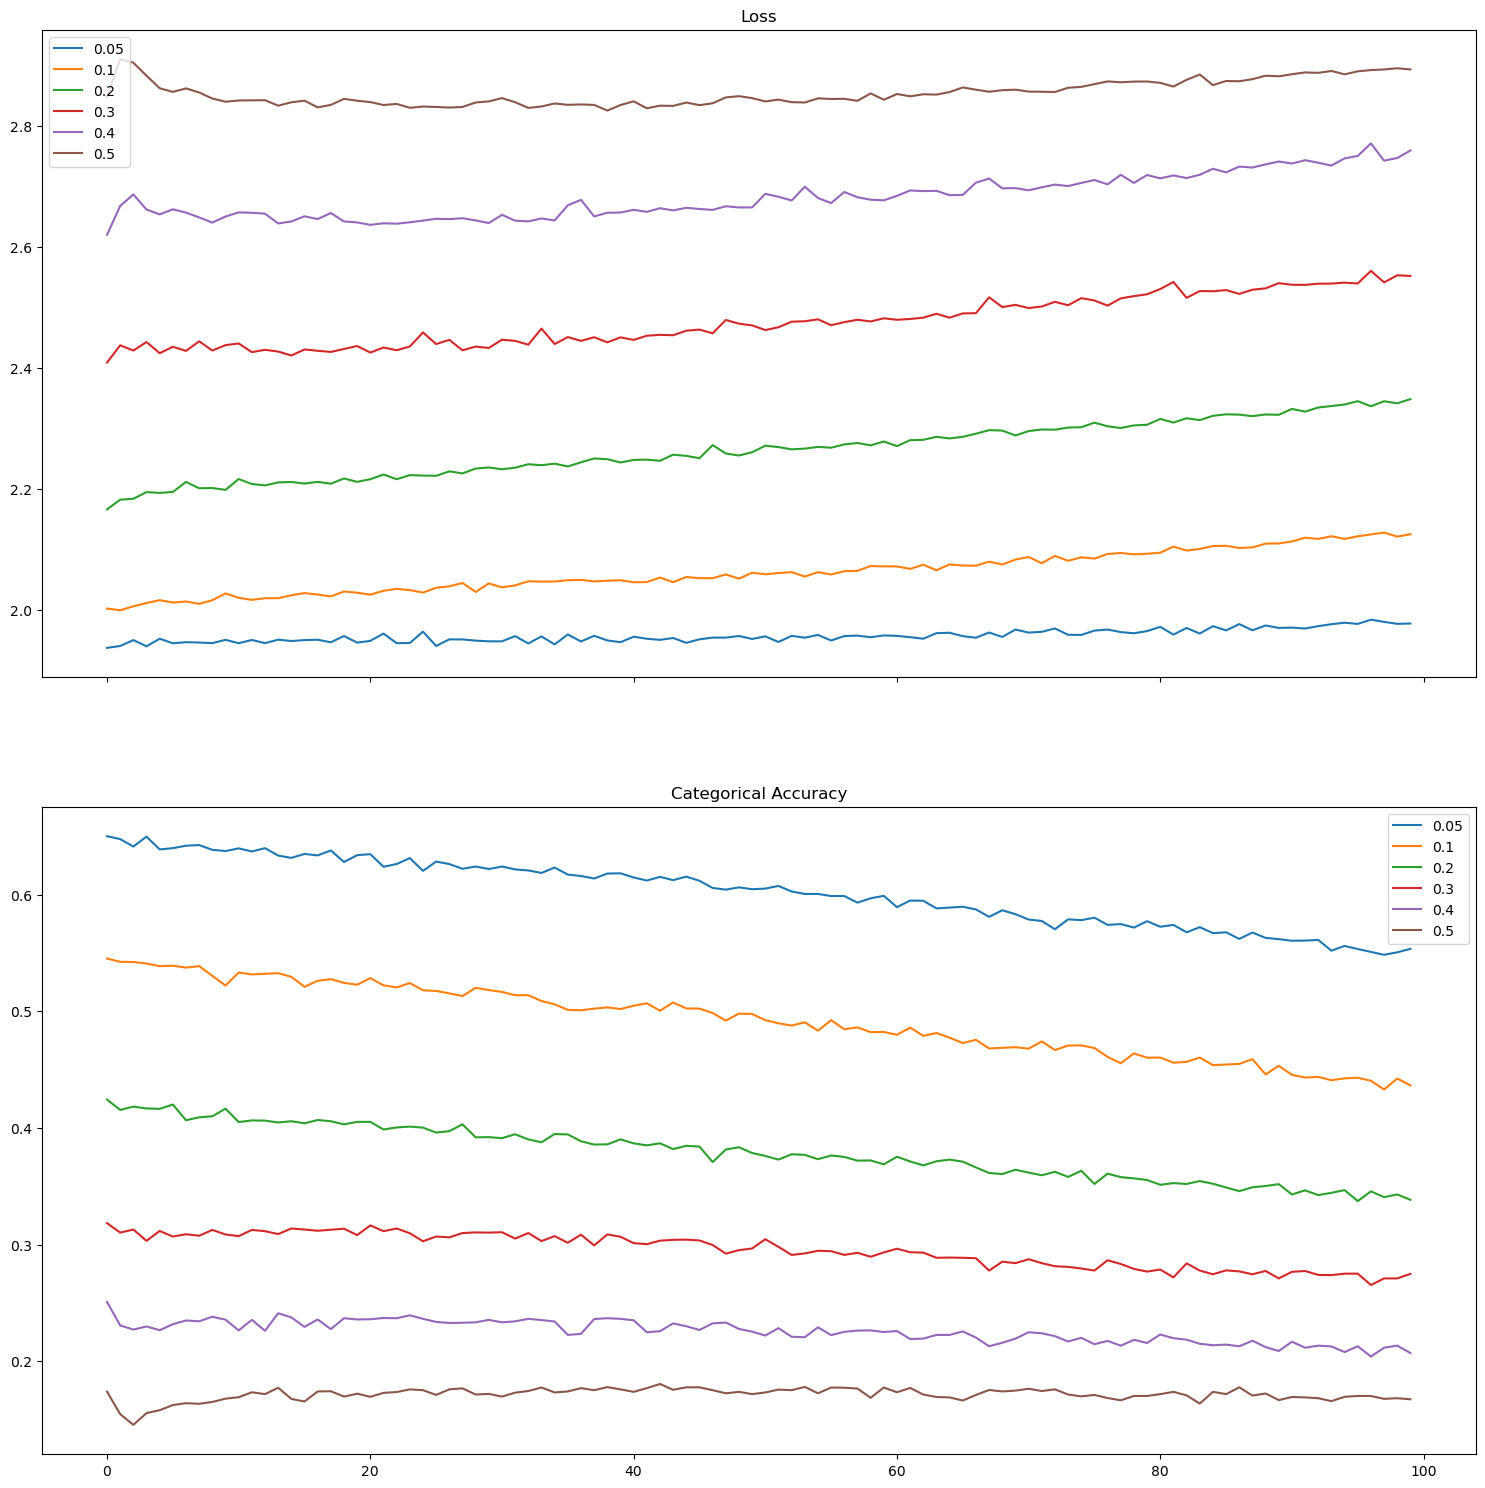

In [129]:
noise_rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
def noisey_y(percentage):
    noise_y_train = y_train
    for index in range(len(noise_y_train)):
        if random.random() < percentage:
            noise_y_train[index] = random.randint(0,19)
    encoder_test = LabelEncoder()
    encoder_test.fit(noise_y_train)
    encoded_y_noise = encoder_test.transform(noise_y_train)
    new_y_noise = np_utils.to_categorical(encoded_y_noise)
    # print(new_y_noise.shape)
    return new_y_noise
def get_model_noise():
    model_2 = Sequential(name="model_2")
    model_2.add(Input(shape=(130107,), name="Input"))
    model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
    model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
    model_2.add(Dense(20, activation='softmax'))
    optimizer_2 = SGD(learning_rate=0.01, momentum=0.9)
    model_2.compile(loss='categorical_crossentropy', optimizer = optimizer_2, metrics=[metrics.CategoricalAccuracy()])
    # model_2.summary()
    return (model_2)
histories = []
fig, axs = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 18.5)
axs[0].set_title('Loss')
axs[1].set_title('Categorical Accuracy')
for noise in noise_rates:
    model = get_model_noise()
    y_set = noisey_y(noise)
    model_hist = model_2.fit(X_train, y_set, batch_size = 2048, epochs=100, verbose =0, validation_data=(X_test, new_y_test))
    histories.append(model_hist)
    axs[0].plot(model_hist.history['val_loss'], label='{}'.format(noise))
    axs[1].plot(model_hist.history['val_categorical_accuracy'], label='{}'.format(noise))
    print(met.classification_report(np.argmax(new_y_test, axis = -1), np.argmax(model.predict(X_test, batch_size = 1), axis= -1), digits = 4))
axs[0].legend()
axs[1].legend()
plt.show()


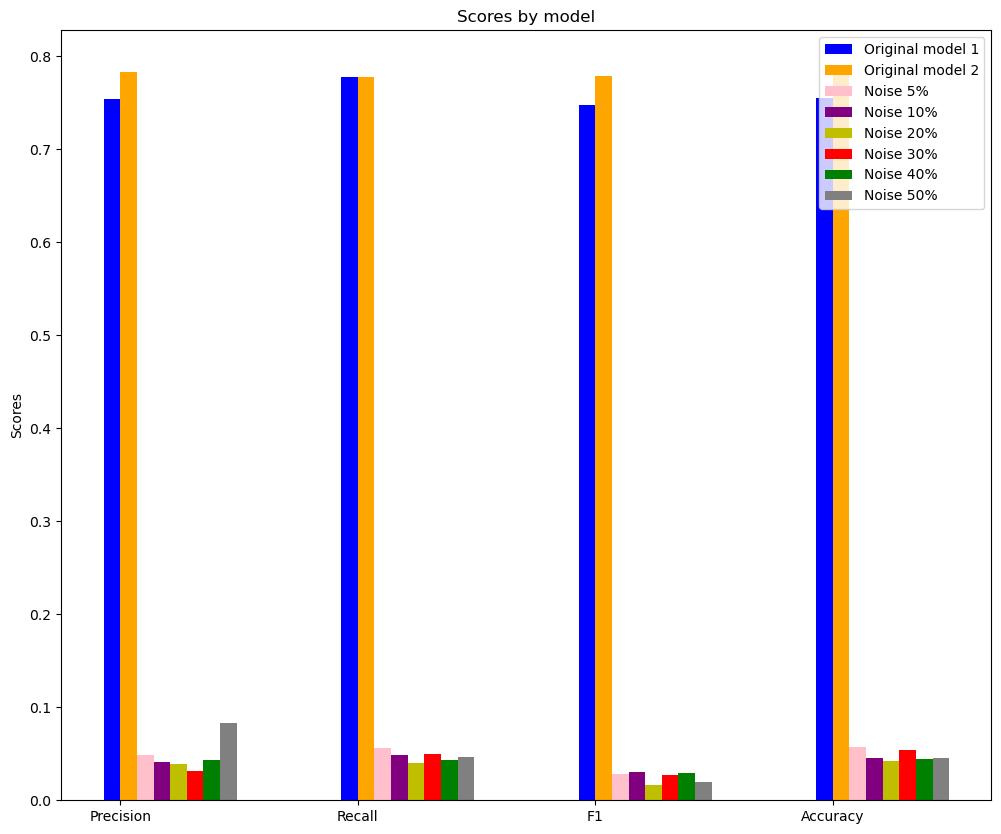

In [133]:
data = [[0.7539, 0.7781, 0.7471, 0.7549],
[0.7835, 0.7781, 0.7786, 0.7885],
[0.0487, 0.0567, 0.0278, 0.0577],
[0.0413, 0.0492, 0.0304, 0.0456],
[0.0391, 0.0402, 0.0167, 0.0419],
[0.0310, 0.0494, 0.0275, 0.0538],
[0.0429, 0.0438, 0.0297, 0.0446],
[0.0835, 0.0463, 0.0197, 0.0458]]
ind = np.arange(4)
width = 0.07
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
original_m_1 = ax.bar(ind, data[0], color = 'b', width = width)
original_m_2 = ax.bar(ind + width, data[1], color = 'orange', width = width)
m_1 = ax.bar(ind + 2 * width, data[2], color = 'pink', width = width)
m_2 = ax.bar(ind + 3 * width, data[3], color = 'purple', width = width)
m_3 = ax.bar(ind + 4 * width, data[4], color = 'y', width = width)
m_4 = ax.bar(ind + 5 * width, data[5], color = 'r', width = width)
m_5 = ax.bar(ind + 6 * width, data[6], color = 'g', width = width)
m_6 = ax.bar(ind + 7 * width, data[7], color = 'grey', width = width)
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Precision', 'Recall', 'F1', 'Accuracy'))
ax.legend((original_m_1[0], original_m_2[0], m_1[0], m_2[0], m_3[0], m_4[0], m_5[0], m_6[0]), ('Original model 1', 'Original model 2','Noise 5%', 'Noise 10%', 'Noise 20%', 'Noise 30%', 'Noise 40%', 'Noise 50%'))
plt.show()

As you can see above introducing any amount of noise into the dataset dramatically reduces the scores, the variation in scores with different ammounts of noise does trend down, with slight variation due to the noise being added randomly and effecting the different classes at different intervals. The line graph better represents the downward trend.